# Dealing with Missing Data

We already reviewed Pandas operations for missing data, now let's apply this to clean a real data file. Keep in mind, there is no 100% correct way of doing this, and this notebook just serves as an example of some reasonable approaches to take on this data.
-----

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from sklearn.cluster import DBSCAN

In [2]:
#Standard visualization plot
def Std_Vis_Plot():
    fig, ax = plt.subplots(figsize=(16, 9),dpi=650)
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid(which='minor', color='black',alpha=0.15, linestyle='--')
    ax.grid(which='major', color='black',alpha=0.33, linestyle='--')

In [3]:
with open('../DATA/Ames_Housing_Feature_Description.txt','r') as f: 
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data


In [4]:
df = pd.read_csv("../DATA/Ames_Housing_Data.csv")

In [5]:
df.head()

PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  526301100           20        RL         141.0     31770   Pave   NaN   
1  526350040           20        RH          80.0     11622   Pave   NaN   
2  526351010           20        RL          81.0     14267   Pave   NaN   
3  526353030           20        RL          93.0     11160   Pave   NaN   
4  527105010           60        RL          74.0     13830   Pave   NaN   

  Lot Shape Land Contour Utilities  ... Pool Area Pool QC  Fence Misc Feature  \
0       IR1          Lvl    AllPub  ...         0     NaN    NaN          NaN   
1       Reg          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   
2       IR1          Lvl    AllPub  ...         0     NaN    NaN         Gar2   
3       Reg          Lvl    AllPub  ...         0     NaN    NaN          NaN   
4       IR1          Lvl    AllPub  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold  Sale Type  Sale Condition  SalePrice  
0        0       5    2010        WD           Normal     215000  
1        0       6    2010        WD           Normal     105000  
2    12500       6    2010        WD           Normal     172000  
3        0       4    2010        WD           Normal     244000  
4        0       3    2010        WD           Normal     189900  

[5 rows x 81 columns]

In [6]:
df['Sale Condition'].unique()

array(['Normal', 'Partial', 'Family', 'Abnorml', 'Alloca', 'AdjLand'],
      dtype=object)

In [7]:
len(df.columns)

81

In [8]:
df.describe().transpose()

count          mean           std          min  \
PID              2930.0  7.144645e+08  1.887308e+08  526301100.0   
MS SubClass      2930.0  5.738737e+01  4.263802e+01         20.0   
Lot Frontage     2440.0  6.922459e+01  2.336533e+01         21.0   
Lot Area         2930.0  1.014792e+04  7.880018e+03       1300.0   
Overall Qual     2930.0  6.094881e+00  1.411026e+00          1.0   
Overall Cond     2930.0  5.563140e+00  1.111537e+00          1.0   
Year Built       2930.0  1.971356e+03  3.024536e+01       1872.0   
Year Remod/Add   2930.0  1.984267e+03  2.086029e+01       1950.0   
Mas Vnr Area     2907.0  1.018968e+02  1.791126e+02          0.0   
BsmtFin SF 1     2929.0  4.426296e+02  4.555908e+02          0.0   
BsmtFin SF 2     2929.0  4.972243e+01  1.691685e+02          0.0   
Bsmt Unf SF      2929.0  5.592625e+02  4.394942e+02          0.0   
Total Bsmt SF    2929.0  1.051615e+03  4.406151e+02          0.0   
1st Flr SF       2930.0  1.159558e+03  3.918909e+02        334.0   
2nd Flr SF       2930.0  3.354560e+02  4.283957e+02          0.0   
Low Qual Fin SF  2930.0  4.676792e+00  4.631051e+01          0.0   
Gr Liv Area      2930.0  1.499690e+03  5.055089e+02        334.0   
Bsmt Full Bath   2928.0  4.313525e-01  5.248202e-01          0.0   
Bsmt Half Bath   2928.0  6.113388e-02  2.452536e-01          0.0   
Full Bath        2930.0  1.566553e+00  5.529406e-01          0.0   
Half Bath        2930.0  3.795222e-01  5.026293e-01          0.0   
Bedroom AbvGr    2930.0  2.854266e+00  8.277311e-01          0.0   
Kitchen AbvGr    2930.0  1.044369e+00  2.140762e-01          0.0   
TotRms AbvGrd    2930.0  6.443003e+00  1.572964e+00          2.0   
Fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0   
Garage Yr Blt    2771.0  1.978132e+03  2.552841e+01       1895.0   
Garage Cars      2929.0  1.766815e+00  7.605664e-01          0.0   
Garage Area      2929.0  4.728197e+02  2.150465e+02          0.0   
Wood Deck SF     2930.0  9.375188e+01  1.263616e+02          0.0   
Open Porch SF    2930.0  4.753345e+01  6.748340e+01          0.0   
Enclosed Porch   2930.0  2.301160e+01  6.413906e+01          0.0   
3Ssn Porch       2930.0  2.592491e+00  2.514133e+01          0.0   
Screen Porch     2930.0  1.600205e+01  5.608737e+01          0.0   
Pool Area        2930.0  2.243345e+00  3.559718e+01          0.0   
Misc Val         2930.0  5.063515e+01  5.663443e+02          0.0   
Mo Sold          2930.0  6.216041e+00  2.714492e+00          1.0   
Yr Sold          2930.0  2.007790e+03  1.316613e+00       2006.0   
SalePrice        2930.0  1.807961e+05  7.988669e+04      12789.0   

                          25%          50%           75%           max  
PID              5.284770e+08  535453620.0  9.071811e+08  1.007100e+09  
MS SubClass      2.000000e+01         50.0  7.000000e+01  1.900000e+02  
Lot Frontage     5.800000e+01         68.0  8.000000e+01  3.130000e+02  
Lot Area         7.440250e+03       9436.5  1.155525e+04  2.152450e+05  
Overall Qual     5.000000e+00          6.0  7.000000e+00  1.000000e+01  
Overall Cond     5.000000e+00          5.0  6.000000e+00  9.000000e+00  
Year Built       1.954000e+03       1973.0  2.001000e+03  2.010000e+03  
Year Remod/Add   1.965000e+03       1993.0  2.004000e+03  2.010000e+03  
Mas Vnr Area     0.000000e+00          0.0  1.640000e+02  1.600000e+03  
BsmtFin SF 1     0.000000e+00        370.0  7.340000e+02  5.644000e+03  
BsmtFin SF 2     0.000000e+00          0.0  0.000000e+00  1.526000e+03  
Bsmt Unf SF      2.190000e+02        466.0  8.020000e+02  2.336000e+03  
Total Bsmt SF    7.930000e+02        990.0  1.302000e+03  6.110000e+03  
1st Flr SF       8.762500e+02       1084.0  1.384000e+03  5.095000e+03  
2nd Flr SF       0.000000e+00          0.0  7.037500e+02  2.065000e+03  
Low Qual Fin SF  0.000000e+00          0.0  0.000000e+00  1.064000e+03  
Gr Liv Area      1.126000e+03       1442.0  1.742750e+03  5.642000e+03  
Bsmt Full Bath   0.000000e+00          0.0  1.00000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

### Removing the PID

We already have an index, so we don't need the PID unique identifier for the regression we will perform later on.

In [10]:
df = df.drop('PID',axis=1)

In [11]:
len(df.columns)

80

In [12]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Gara

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The String columns:

In [13]:
#Filling missing data with NA based on documentation
str_na_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 
                'BsmtFin Type 1', 'BsmtFin Type 2','Pool QC', 
                'Alley', 'Fireplace Qu', 'Garage Type', 
                'Garage Finish','Garage Qual','Garage Cond',
                'Fence', 'Misc Feature', 'Mas Vnr Type' ]
df[str_na_cols] = df[str_na_cols].fillna('NA')

**Filling in data based on column names. There are 2 types of basement features, numerical and string descriptives.**

The numerical columns:

In [14]:
#Filling missing data with 0 based on documentation
int_na_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
               'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 
               'Mas Vnr Area','Garage Yr Blt','Garage Cars',
               'Garage Area']
df[int_na_cols] = df[int_na_cols].fillna(0)

In [15]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave    NA       IR1   
1           20        RH          80.0     11622   Pave    NA       Reg   
2           20        RL          81.0     14267   Pave    NA       IR1   
3           20        RL          93.0     11160   Pave    NA       Reg   
4           60        RL          74.0     13830   Pave    NA       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0      NA     NA   
1          Lvl    AllPub     Inside  ...         0      NA  MnPrv   
2          Lvl    AllPub     Corner  ...         0      NA     NA   
3          Lvl    AllPub     Corner  ...         0      NA     NA   
4          Lvl    AllPub     Inside  ...         0      NA  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0           NA        0       5     2010        WD           Normal     215000  
1           NA        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3           NA        0       4     2010        WD           Normal     244000  
4           NA        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

## Observing NaN Features

In [16]:
dfnull = df[df.isnull().any(axis=1)]

In [17]:
dfnull

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
11             20        RL           NaN      7980   Pave    NA       IR1   
14            120        RL           NaN      6820   Pave    NA       IR1   
22             60        FV           NaN      7500   Pave    NA       Reg   
23             20        RL           NaN     11241   Pave    NA       IR1   
24             20        RL           NaN     12537   Pave    NA       IR1   
...           ...       ...           ...       ...    ...   ...       ...   
2894           20        RL           NaN     16669   Pave    NA       IR1   
2897           60        RL           NaN     11170   Pave    NA       IR2   
2898           20        RL           NaN      8098   Pave    NA       IR1   
2912           90        RL           NaN     11836   Pave    NA       IR1   
2926           20        RL           NaN      8885   Pave    NA       IR1   

     Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
11            Lvl    AllPub     Inside  ...         0      NA  GdPrv   
14            Lvl    AllPub     Corner  ...         0      NA     NA   
22            Lvl    AllPub     Inside  ...         0      NA     NA   
23            Lvl    AllPub    CulDSac  ...         0      NA     NA   
24            Lvl    AllPub    CulDSac  ...         0      NA     NA   
...           ...       ...        ...  ...       ...     ...    ...   
2894          Lvl    AllPub     Corner  ...         0      NA     NA   
2897          Lvl    AllPub     Corner  ...         0      NA  GdPrv   
2898          Lvl    AllPub     Inside  ...         0      NA     NA   
2912          Lvl    AllPub     Corner  ...         0      NA     NA   
2926          Low    AllPub     Inside  ...         0      NA  MnPrv   

     Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  \
11           Shed      500       3     2010        WD           Normal   
14             NA        0       6     2010        WD           Normal   
22             NA        0       1     2010        WD           Normal   
23           Shed      700       3     2010        WD           Normal   
24             NA        0       4     2010        WD           Normal   
...           ...      ...     ...      ...        ...             ...   
2894           NA        0       1     2006        WD           Normal   
2897           NA        0       4     2006        WD           Normal   
2898           NA        0      10     2006        WD           Normal   
2912           NA        0       3     2006        WD           Normal   
2926           NA        0       6     2006        WD           Normal   

      SalePrice  
11       185000  
14       212000  
22       216000  
23       149000  
24       149900  
...         ...  
2894     228000  
2897     250000  
2898     202000  
2912     146500  
2926     131000  

[491 rows x 80 columns]

In [18]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

In [19]:
100* (df.isnull().sum() / len(df))

MS SubClass        0.000000
MS Zoning          0.000000
Lot Frontage      16.723549
Lot Area           0.000000
Street             0.000000
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 80, dtype: float64

In [20]:
def percent_missing(df):
    percent_nan = 100* (df.isna().sum() / len(df))
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [21]:
percent_nan = percent_missing(df)

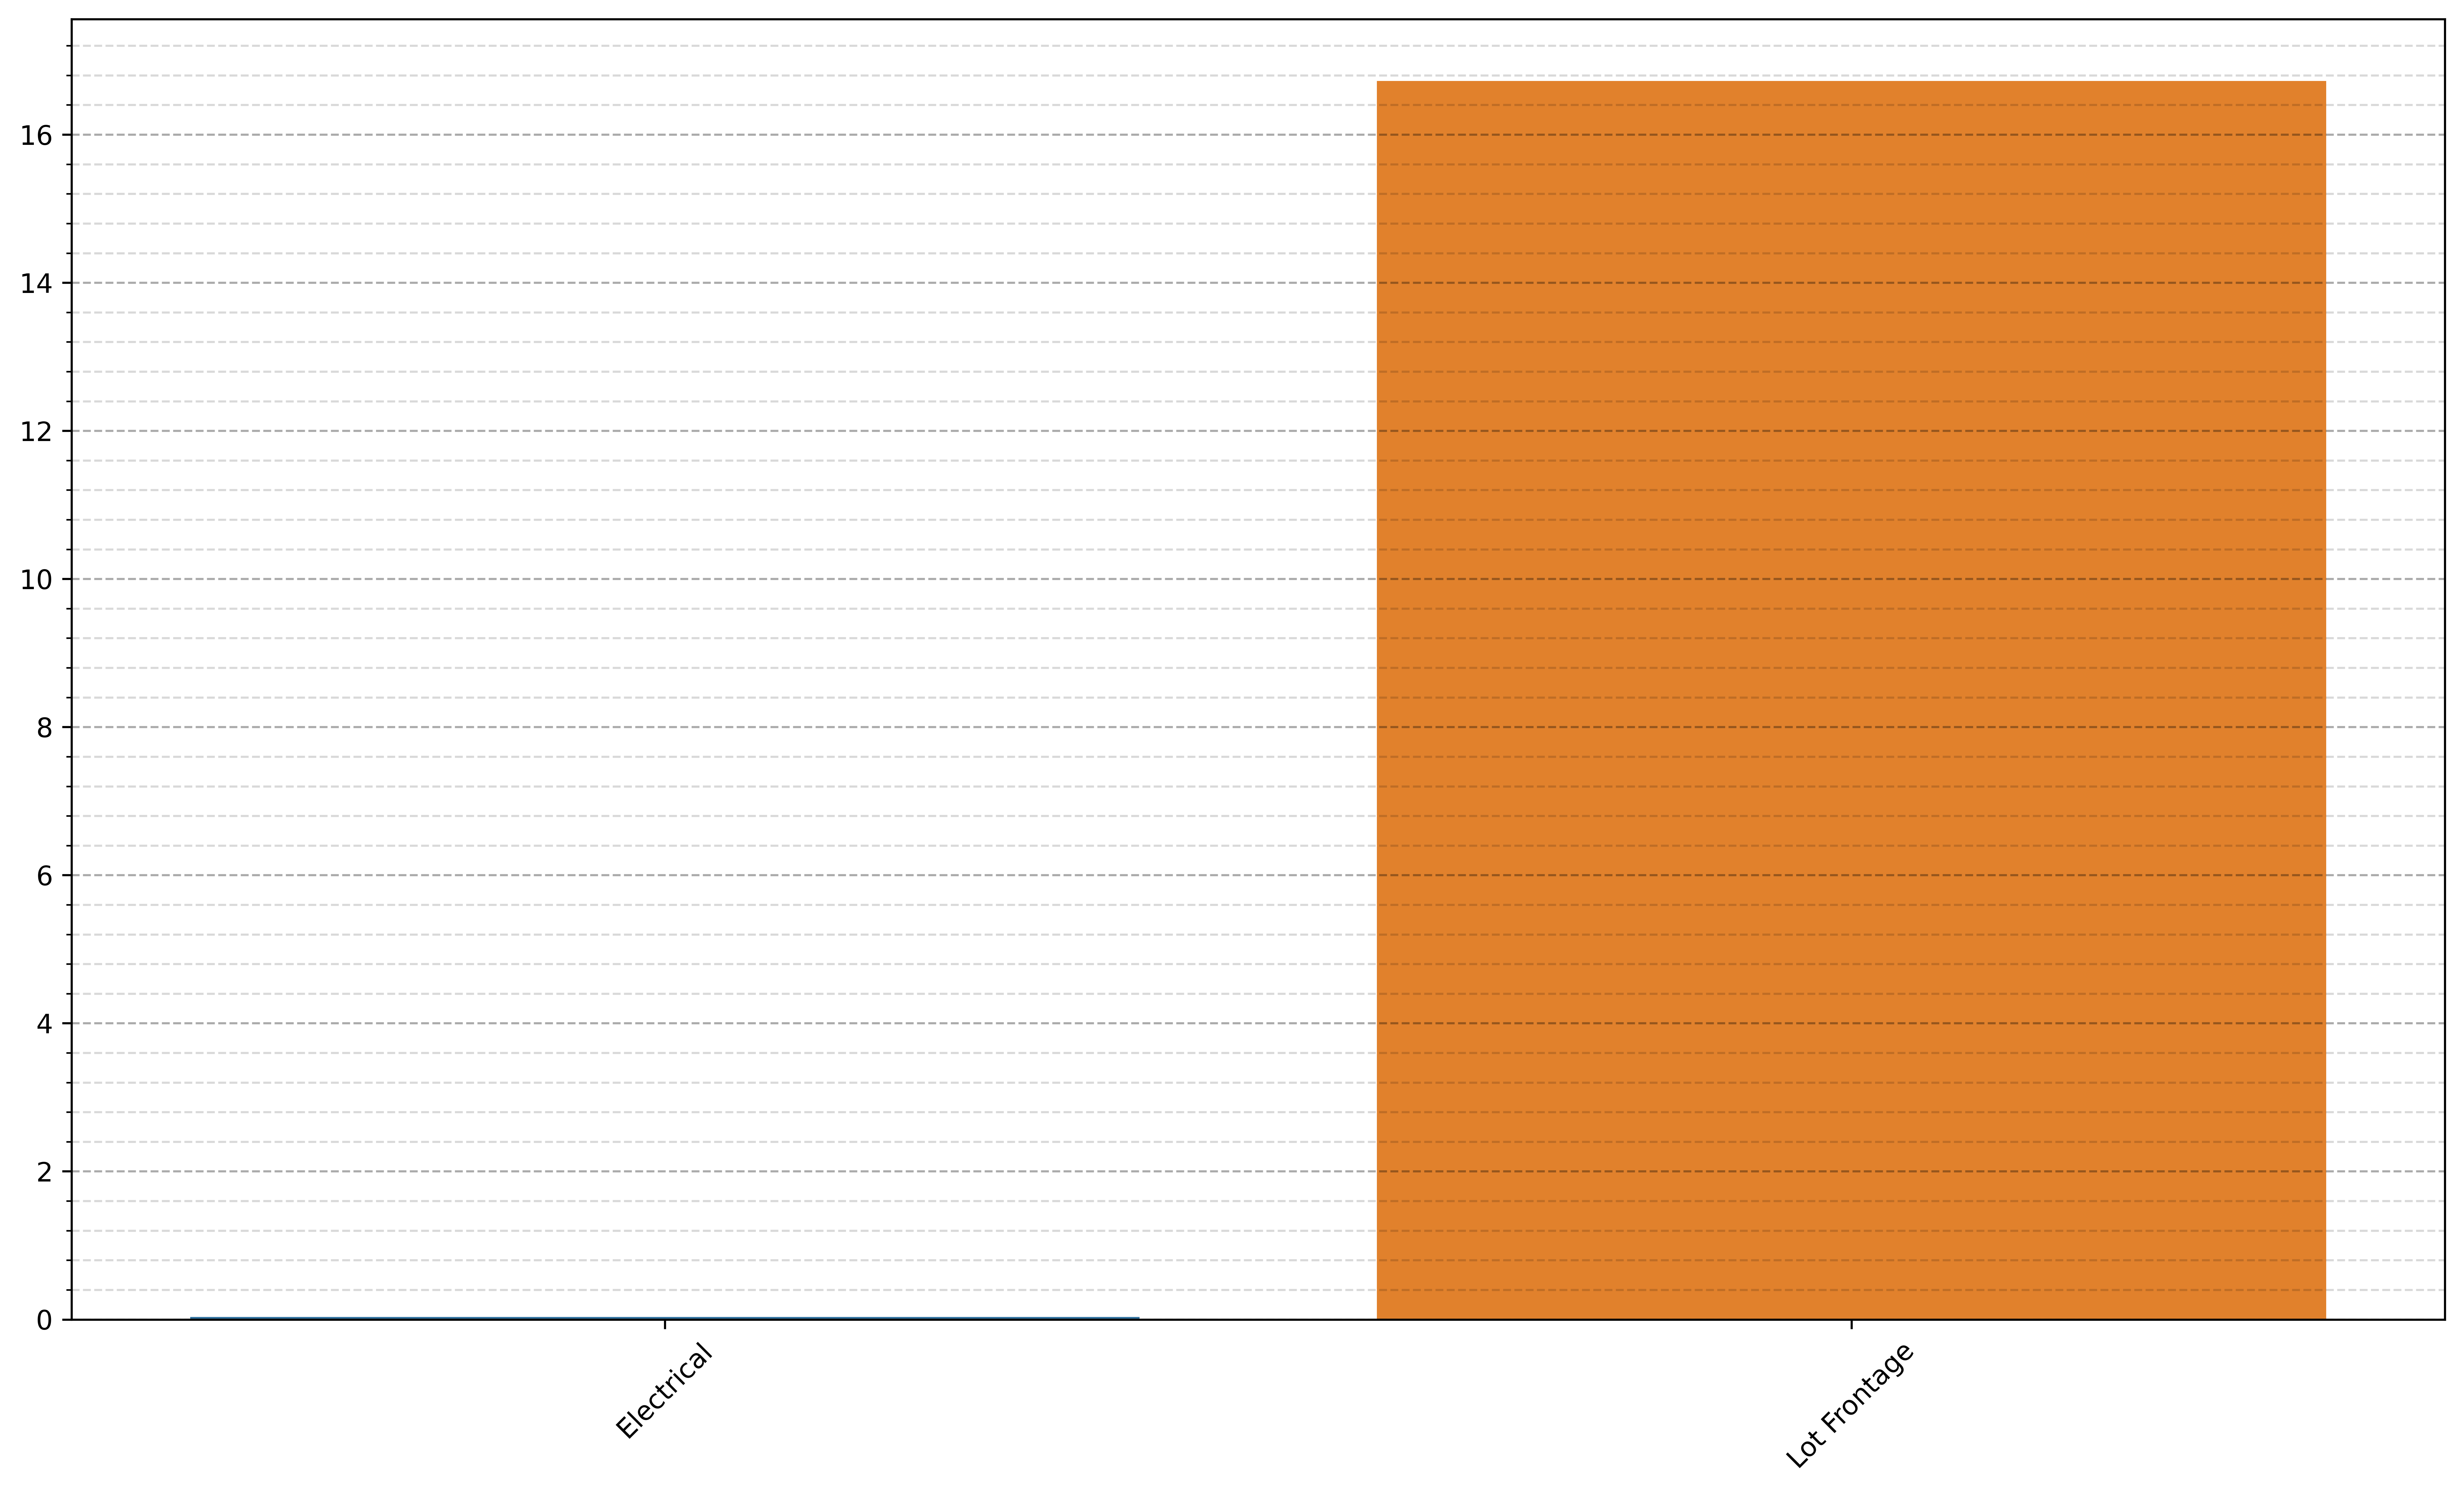

In [22]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);

# Removing Features or Removing Rows

If only a few rows relative to the size of your dataset are missing some values, then it might just be a good idea to drop those rows. What does this cost you in terms of performace? It essentialy removes potential training/testing data, but if its only a few rows, its unlikely to change performance.

Sometimes it is a good idea to remove a feature entirely if it has too many null values. However, you should carefully consider why it has so many null values, in certain situations null could just be used as a separate category. 

Take for example a feature column for the number of cars that can fit into a garage. Perhaps if there is no garage then there is a null value, instead of a zero. It probably makes more sense to quickly fill the null values in this case with a zero instead of a null. Only you can decide based off your domain expertise and knowledge of the data set!

## Working based on Rows Missing Data

## Filling in Data or Dropping Data?

Let's explore how to choose to remove or fill in missing data for rows that are missing some data. Let's choose some threshold where we decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). We will choose 1% as our threshold. This means if less than 1% of the rows are missing this feature, we will consider just dropping that row, instead of dealing with the feature itself. There is no right answer here, just use common sense and your domain knowledge of the dataset, obviously you don't want to drop a very high threshold like 50% , you should also explore correlation to the dataset, maybe it makes sense to drop the feature instead.

Based on the text description of the features, you will see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none".

(0.0, 1.0)

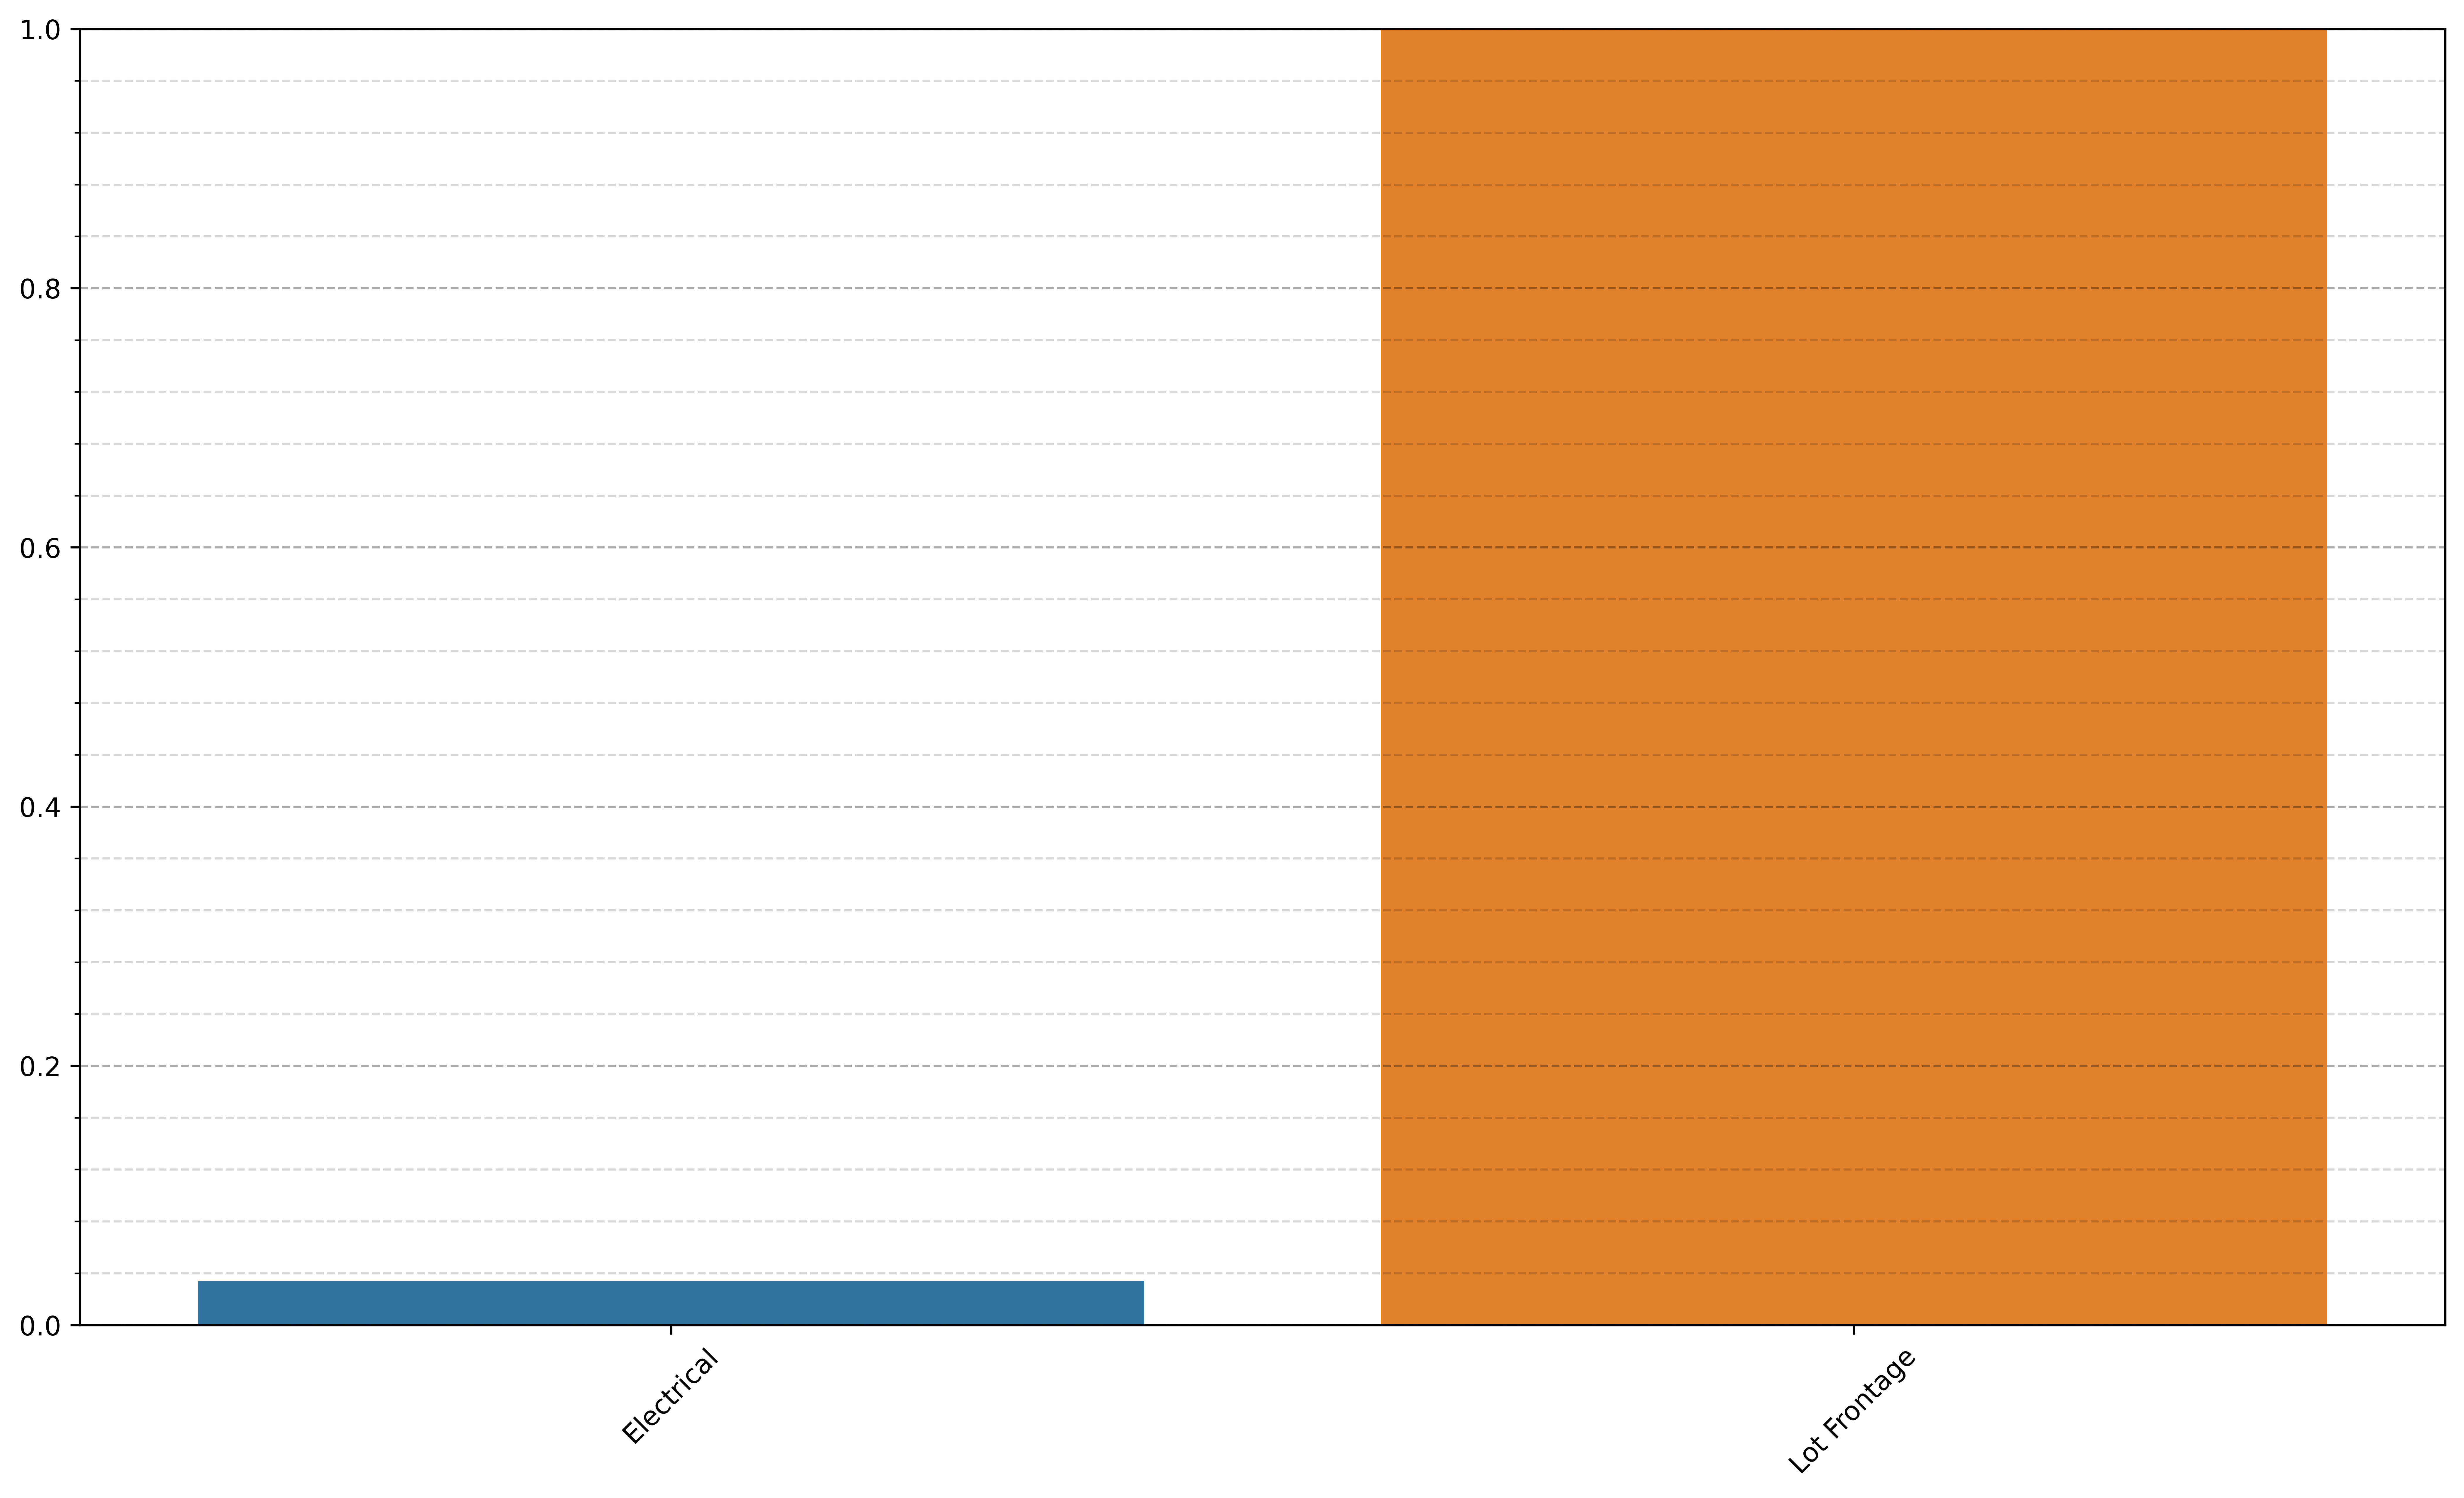

In [23]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);
# Set 1% Threshold
plt.ylim(0,1)

Let's drop or fill the rows based on this data. You could either manually fill in the data OR you could simply drop the row and not consider it.

In [24]:
#Another way to see the columns where percent_nan is less then 1%
percent_nan[percent_nan < 1]

Electrical    0.03413
dtype: float64

## Dropping Rows

A few of these features appear that it is just one or two rows missing the data. Based on our description .txt file of the dataset, we could also fill in these data points easily, and that is the more correct approach, but here we show how to drop in case you find yourself in a situation where it makes more sense to drop a row, based on missing column features.

    df.dropna() ---
        subset : array-like, optional
                Labels along other axis to consider, e.g. if you are dropping rows
                these would be a list of columns to include.

In [25]:
df = df.dropna(axis=0,subset=['Electrical'])

In [26]:
percent_nan = percent_missing(df)

(0.0, 1.0)

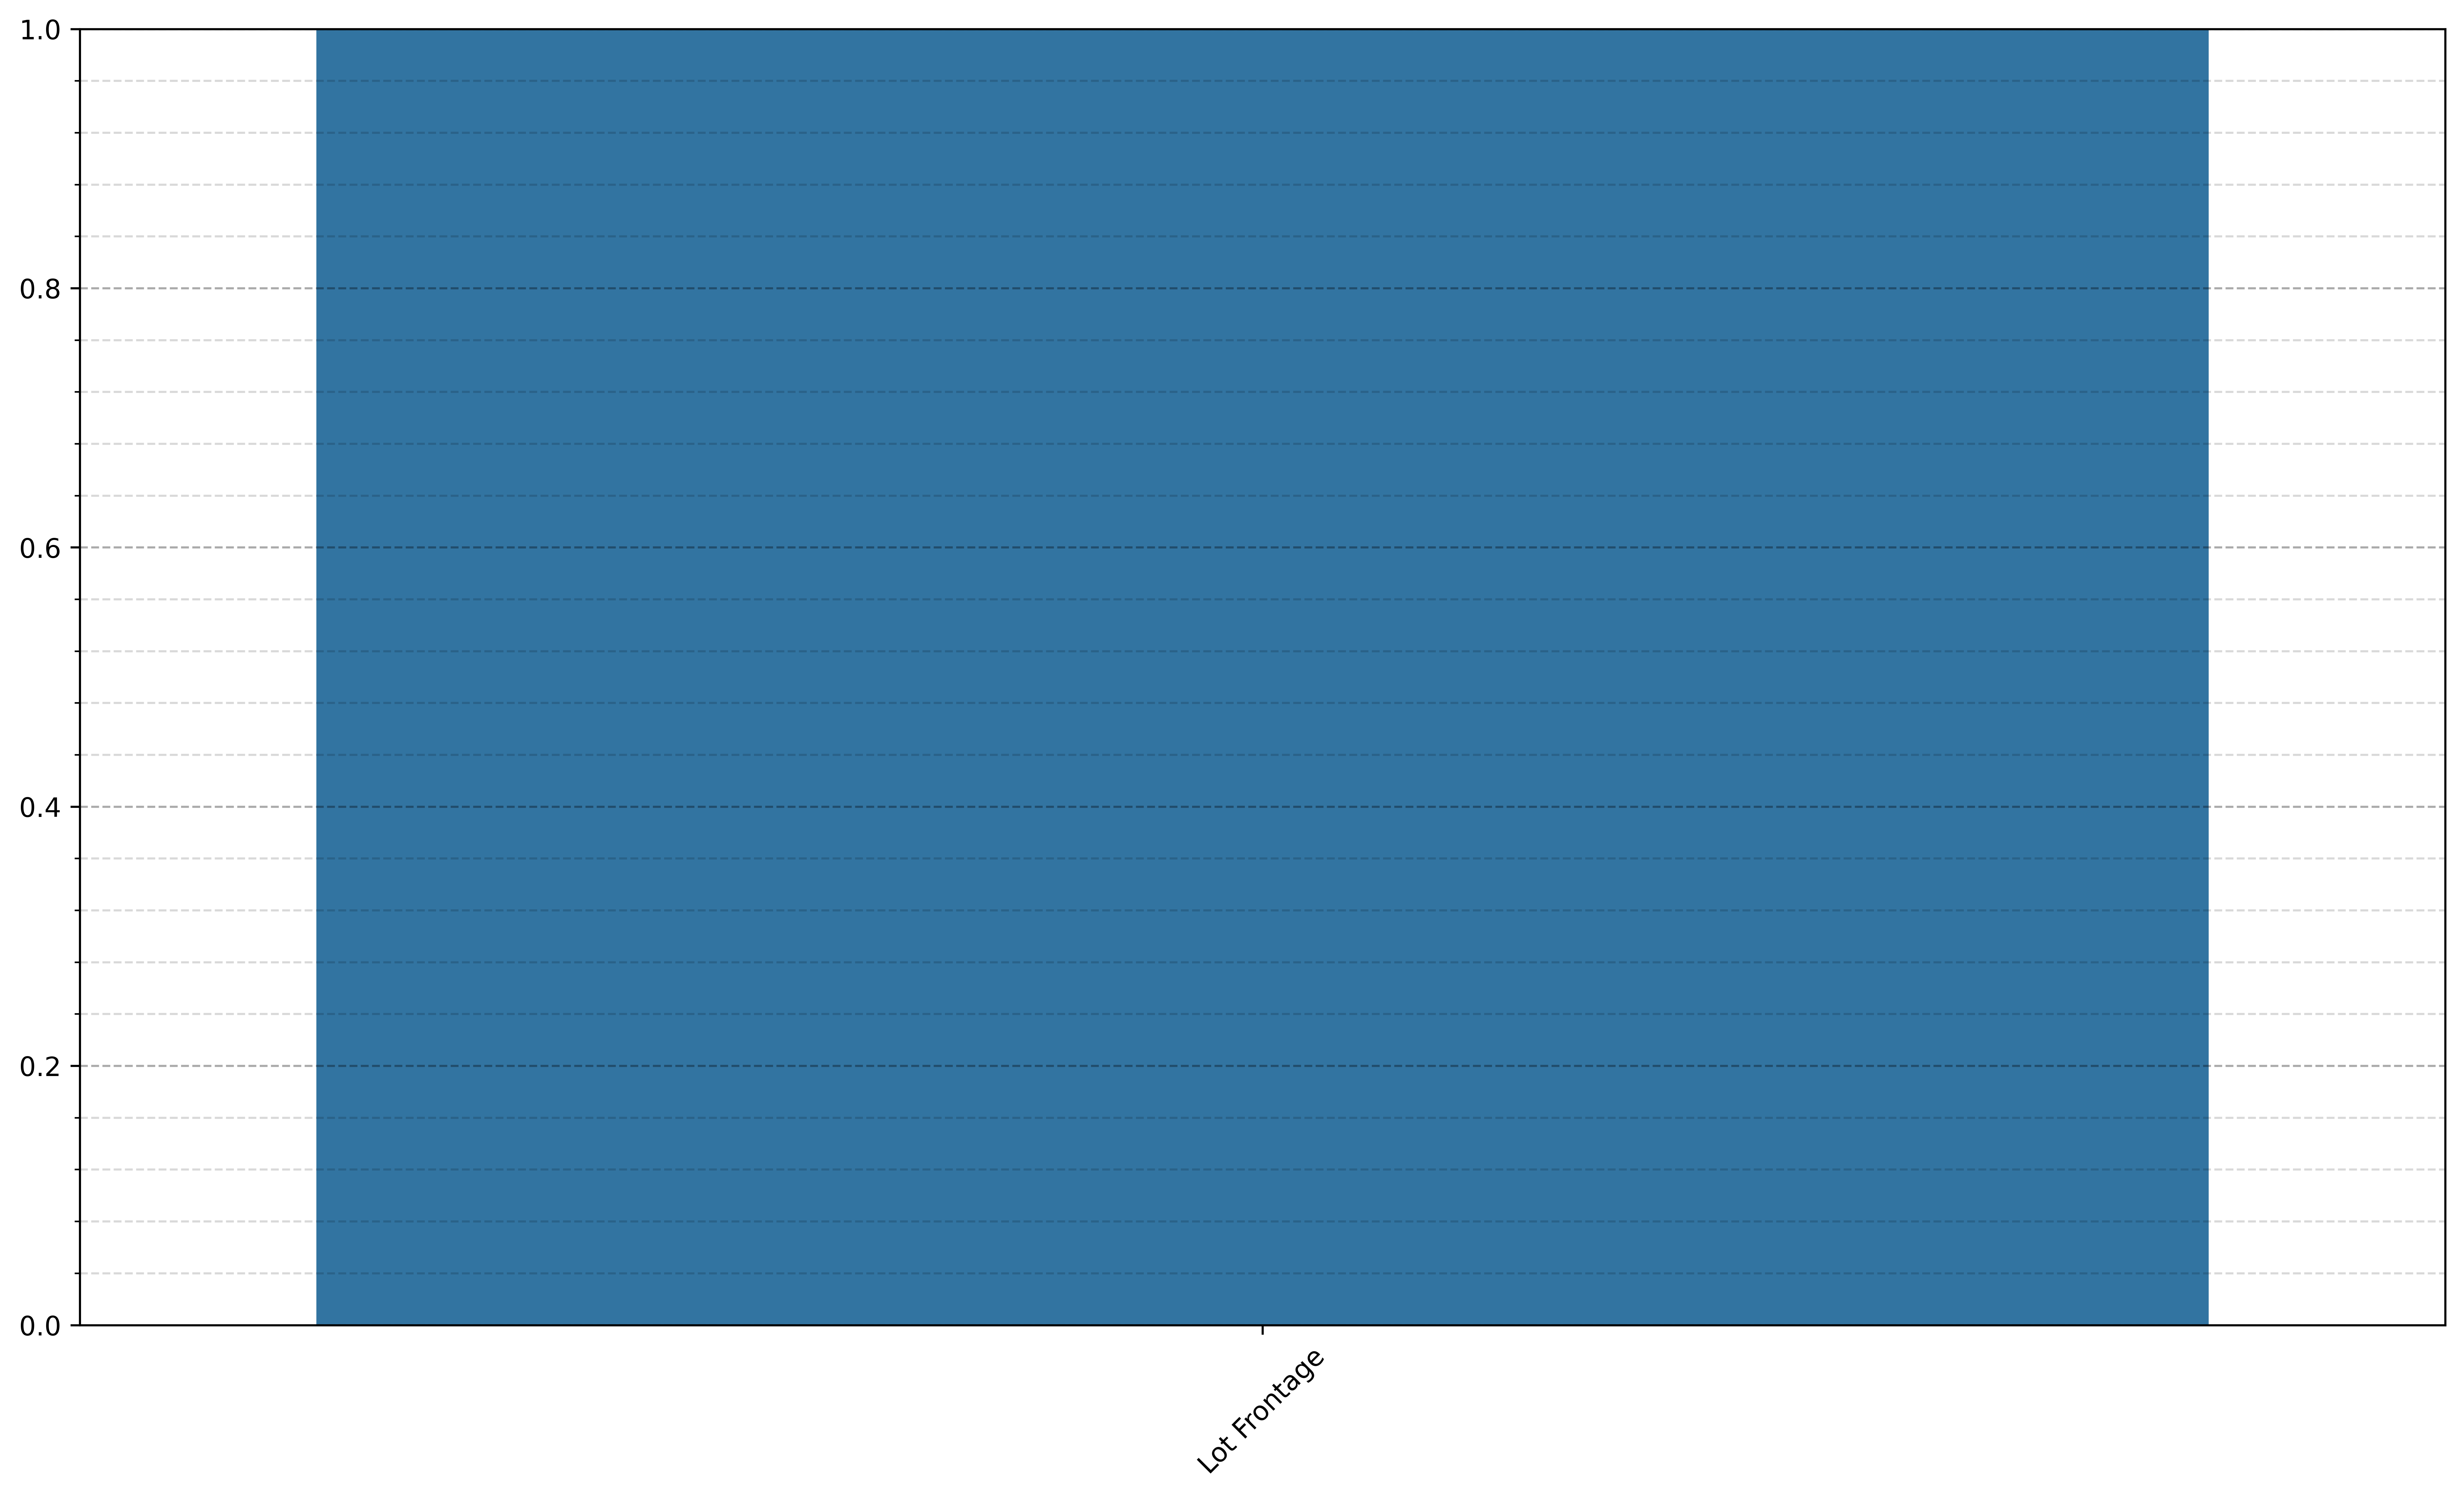

In [27]:
Std_Vis_Plot()
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=45);
plt.ylim(0,1)

# Filling In Missing Column Data

Our previous approaches were based more on rows missing data, now we will take an approach based on the column features themselves, since larger percentages of the data appears to be missing.

# [Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) of Missing Data

To impute missing data, we need to decide what other filled in (no NaN values) feature most probably relates and is correlated with the missing feature data. In this particular case we will use:

Neighborhood: Physical locations within Ames city limits

LotFrontage: Linear feet of street connected to property

We will operate under the assumption that the Lot Frontage is related to what neighborhood a house is in.

In [28]:
df['Neighborhood'].unique()

array(['NAmes', 'Gilbert', 'StoneBr', 'NWAmes', 'Somerst', 'BrDale',
       'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'SawyerW', 'Sawyer',
       'Greens', 'BrkSide', 'OldTown', 'IDOTRR', 'ClearCr', 'SWISU',
       'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'Mitchel', 'Timber',
       'MeadowV', 'Veenker', 'GrnHill', 'Landmrk'], dtype=object)

In [29]:
Neighborhoods= ['GrnHill', 'Landmrk']
df[df['Neighborhood'].isin(Neighborhoods)]['Lot Frontage']

2256   NaN
2788   NaN
2892   NaN
Name: Lot Frontage, dtype: float64

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

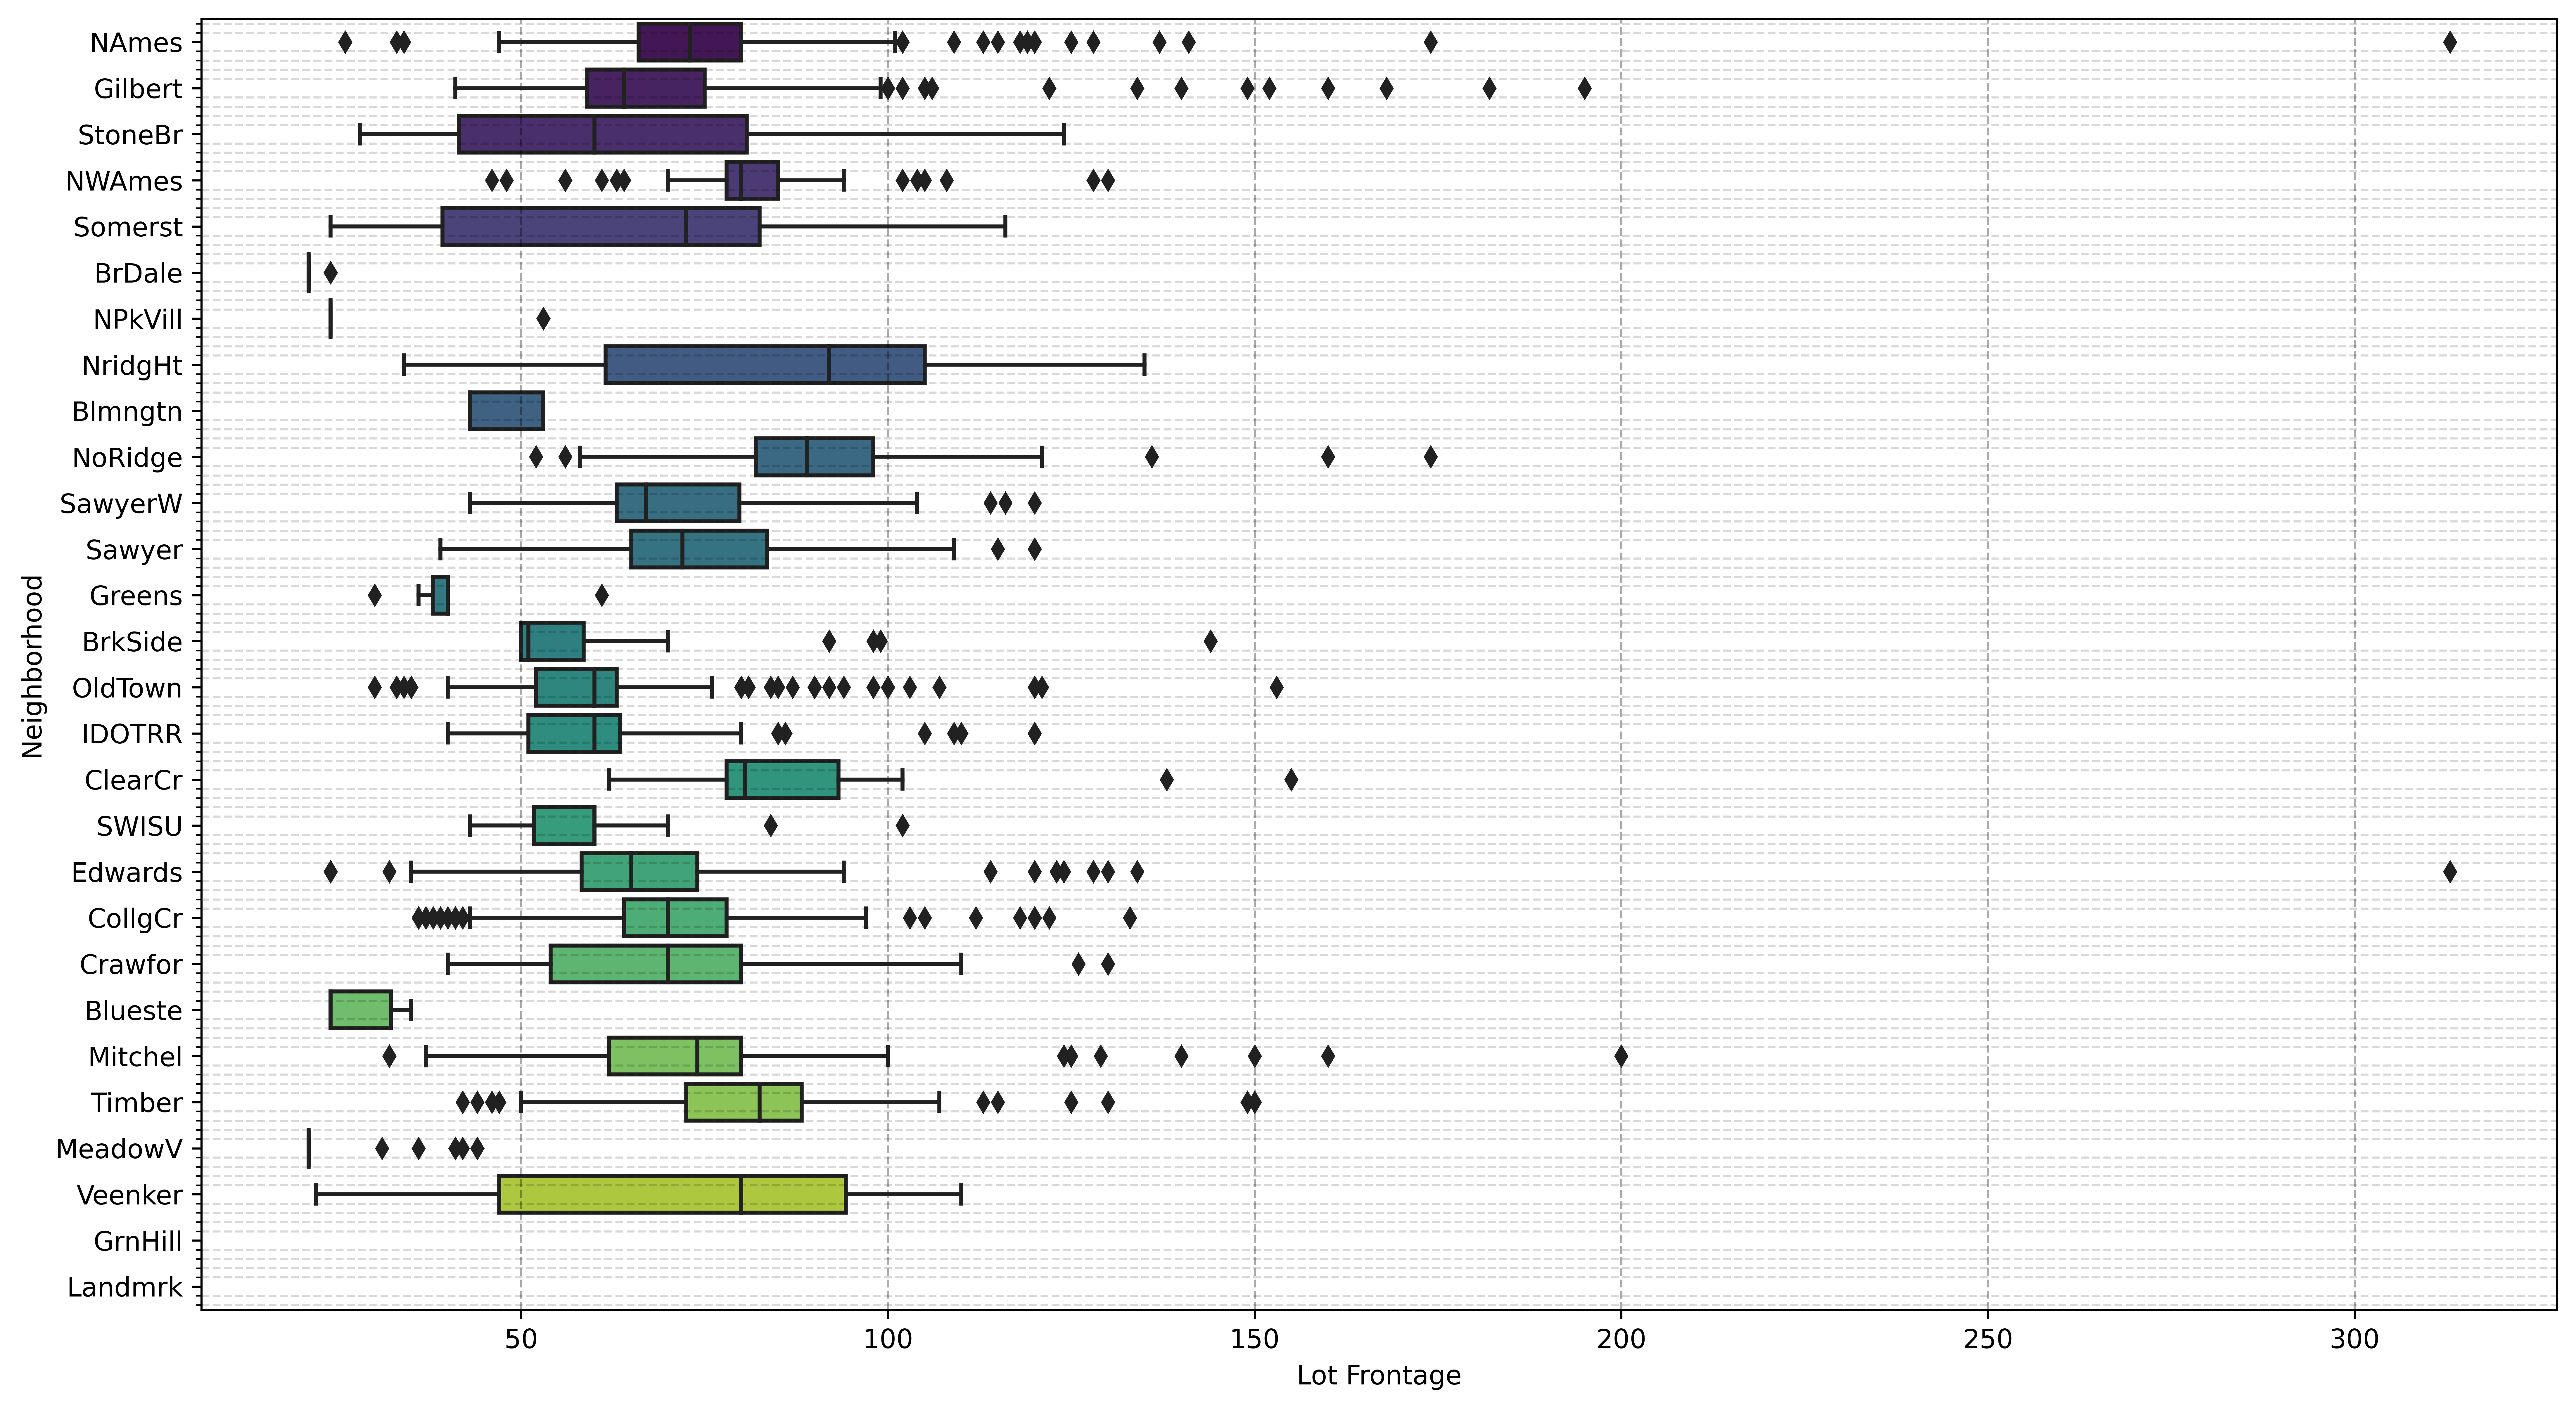

In [30]:
Std_Vis_Plot()
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=df,orient='h',palette='viridis')

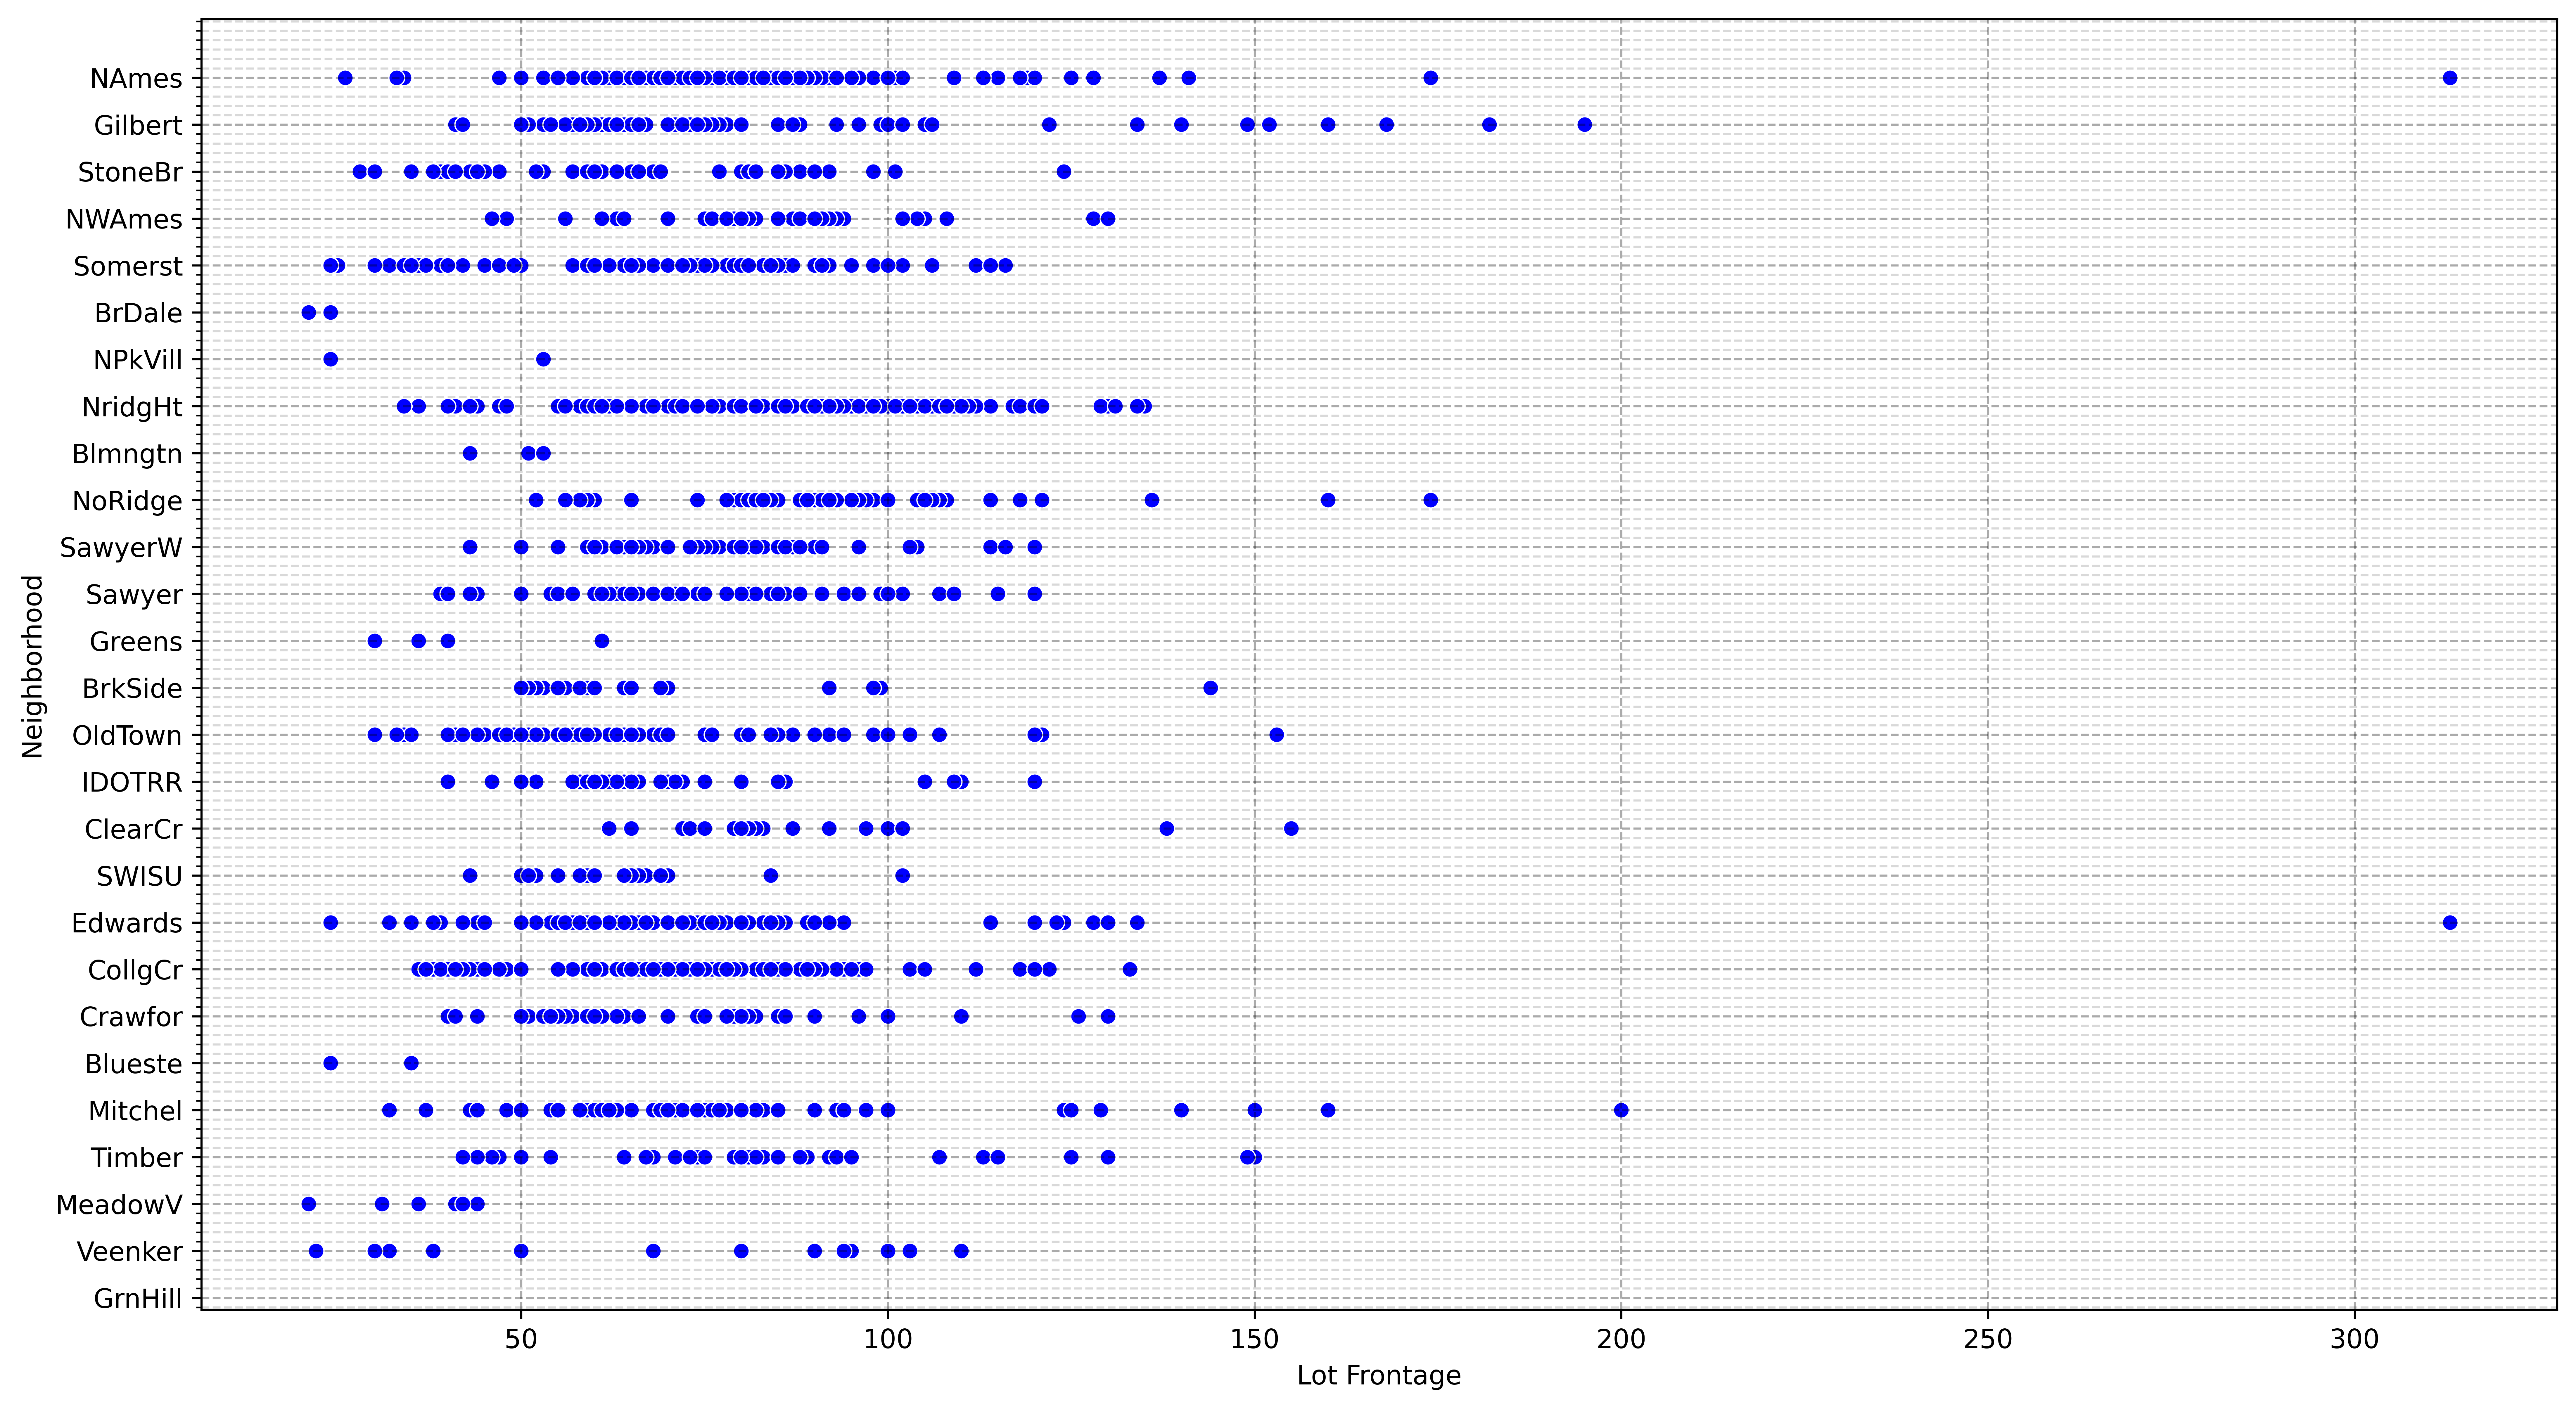

In [31]:
Std_Vis_Plot()
sns.scatterplot(y='Neighborhood',x='Lot Frontage',data=df,color='blue');

## Impute Missing Data based on other Features

There are more complex methods, but usually the simpler the better, it avoids building models on top of other models.

More Info on Options: https://scikit-learn.org/stable/modules/impute.html

In [32]:
group_by='Neighborhood'

In [33]:
lot_front_min=df.groupby(group_by)['Lot Frontage'].mean()-(norm.ppf(0.95)*df.groupby(group_by)['Lot Frontage'].std()/(np.sqrt(df.groupby(group_by)['Lot Frontage'].count())))
lot_front_min=lot_front_min.fillna(0)
lot_front_min

Neighborhood
Blmngtn    45.090661
Blueste    24.536189
BrDale     21.158506
BrkSide    53.642391
ClearCr    79.827391
CollgCr    69.568637
Crawfor    66.495926
Edwards    63.658785
Gilbert    69.775409
Greens     35.047712
GrnHill     0.000000
IDOTRR     59.516057
Landmrk     0.000000
MeadowV    23.165992
Mitchel    70.498739
NAmes      73.538523
NPkVill    24.410460
NWAmes     79.348842
NoRidge    86.707288
NridgHt    80.746001
OldTown    60.076988
SWISU      56.610252
Sawyer     72.031250
SawyerW    68.371737
Somerst    61.449789
StoneBr    56.912144
Timber     76.163257
Veenker    60.223683
Name: Lot Frontage, dtype: float64

In [34]:
lot_front_max=df.groupby(group_by)['Lot Frontage'].mean()+(norm.ppf(0.95)*df.groupby(group_by)['Lot Frontage'].std()/(np.sqrt(df.groupby(group_by)['Lot Frontage'].count())))
lot_front_max=lot_front_max.fillna(0)
lot_front_max

Neighborhood
Blmngtn    48.709339
Blueste    30.063811
BrDale     21.841494
BrkSide    57.936556
ClearCr    96.472609
CollgCr    73.104091
Crawfor    73.407688
Edwards    70.161439
Gilbert    78.639005
Greens     46.952288
GrnHill     0.000000
IDOTRR     64.966702
Landmrk     0.000000
MeadowV    28.046129
Mitchel    79.790150
NAmes      76.882810
NPkVill    31.875254
NWAmes     83.686452
NoRidge    96.551971
NridgHt    87.622098
OldTown    63.477597
SWISU      61.526112
Sawyer     77.070791
SawyerW    72.967885
Somerst    67.648976
StoneBr    67.435682
Timber     86.443885
Veenker    83.776317
Name: Lot Frontage, dtype: float64

In [35]:
Neighborhoods= ['GrnHill', 'Landmrk']
df[df['Neighborhood'].isin(Neighborhoods)]['Lot Frontage']

2256   NaN
2788   NaN
2892   NaN
Name: Lot Frontage, dtype: float64

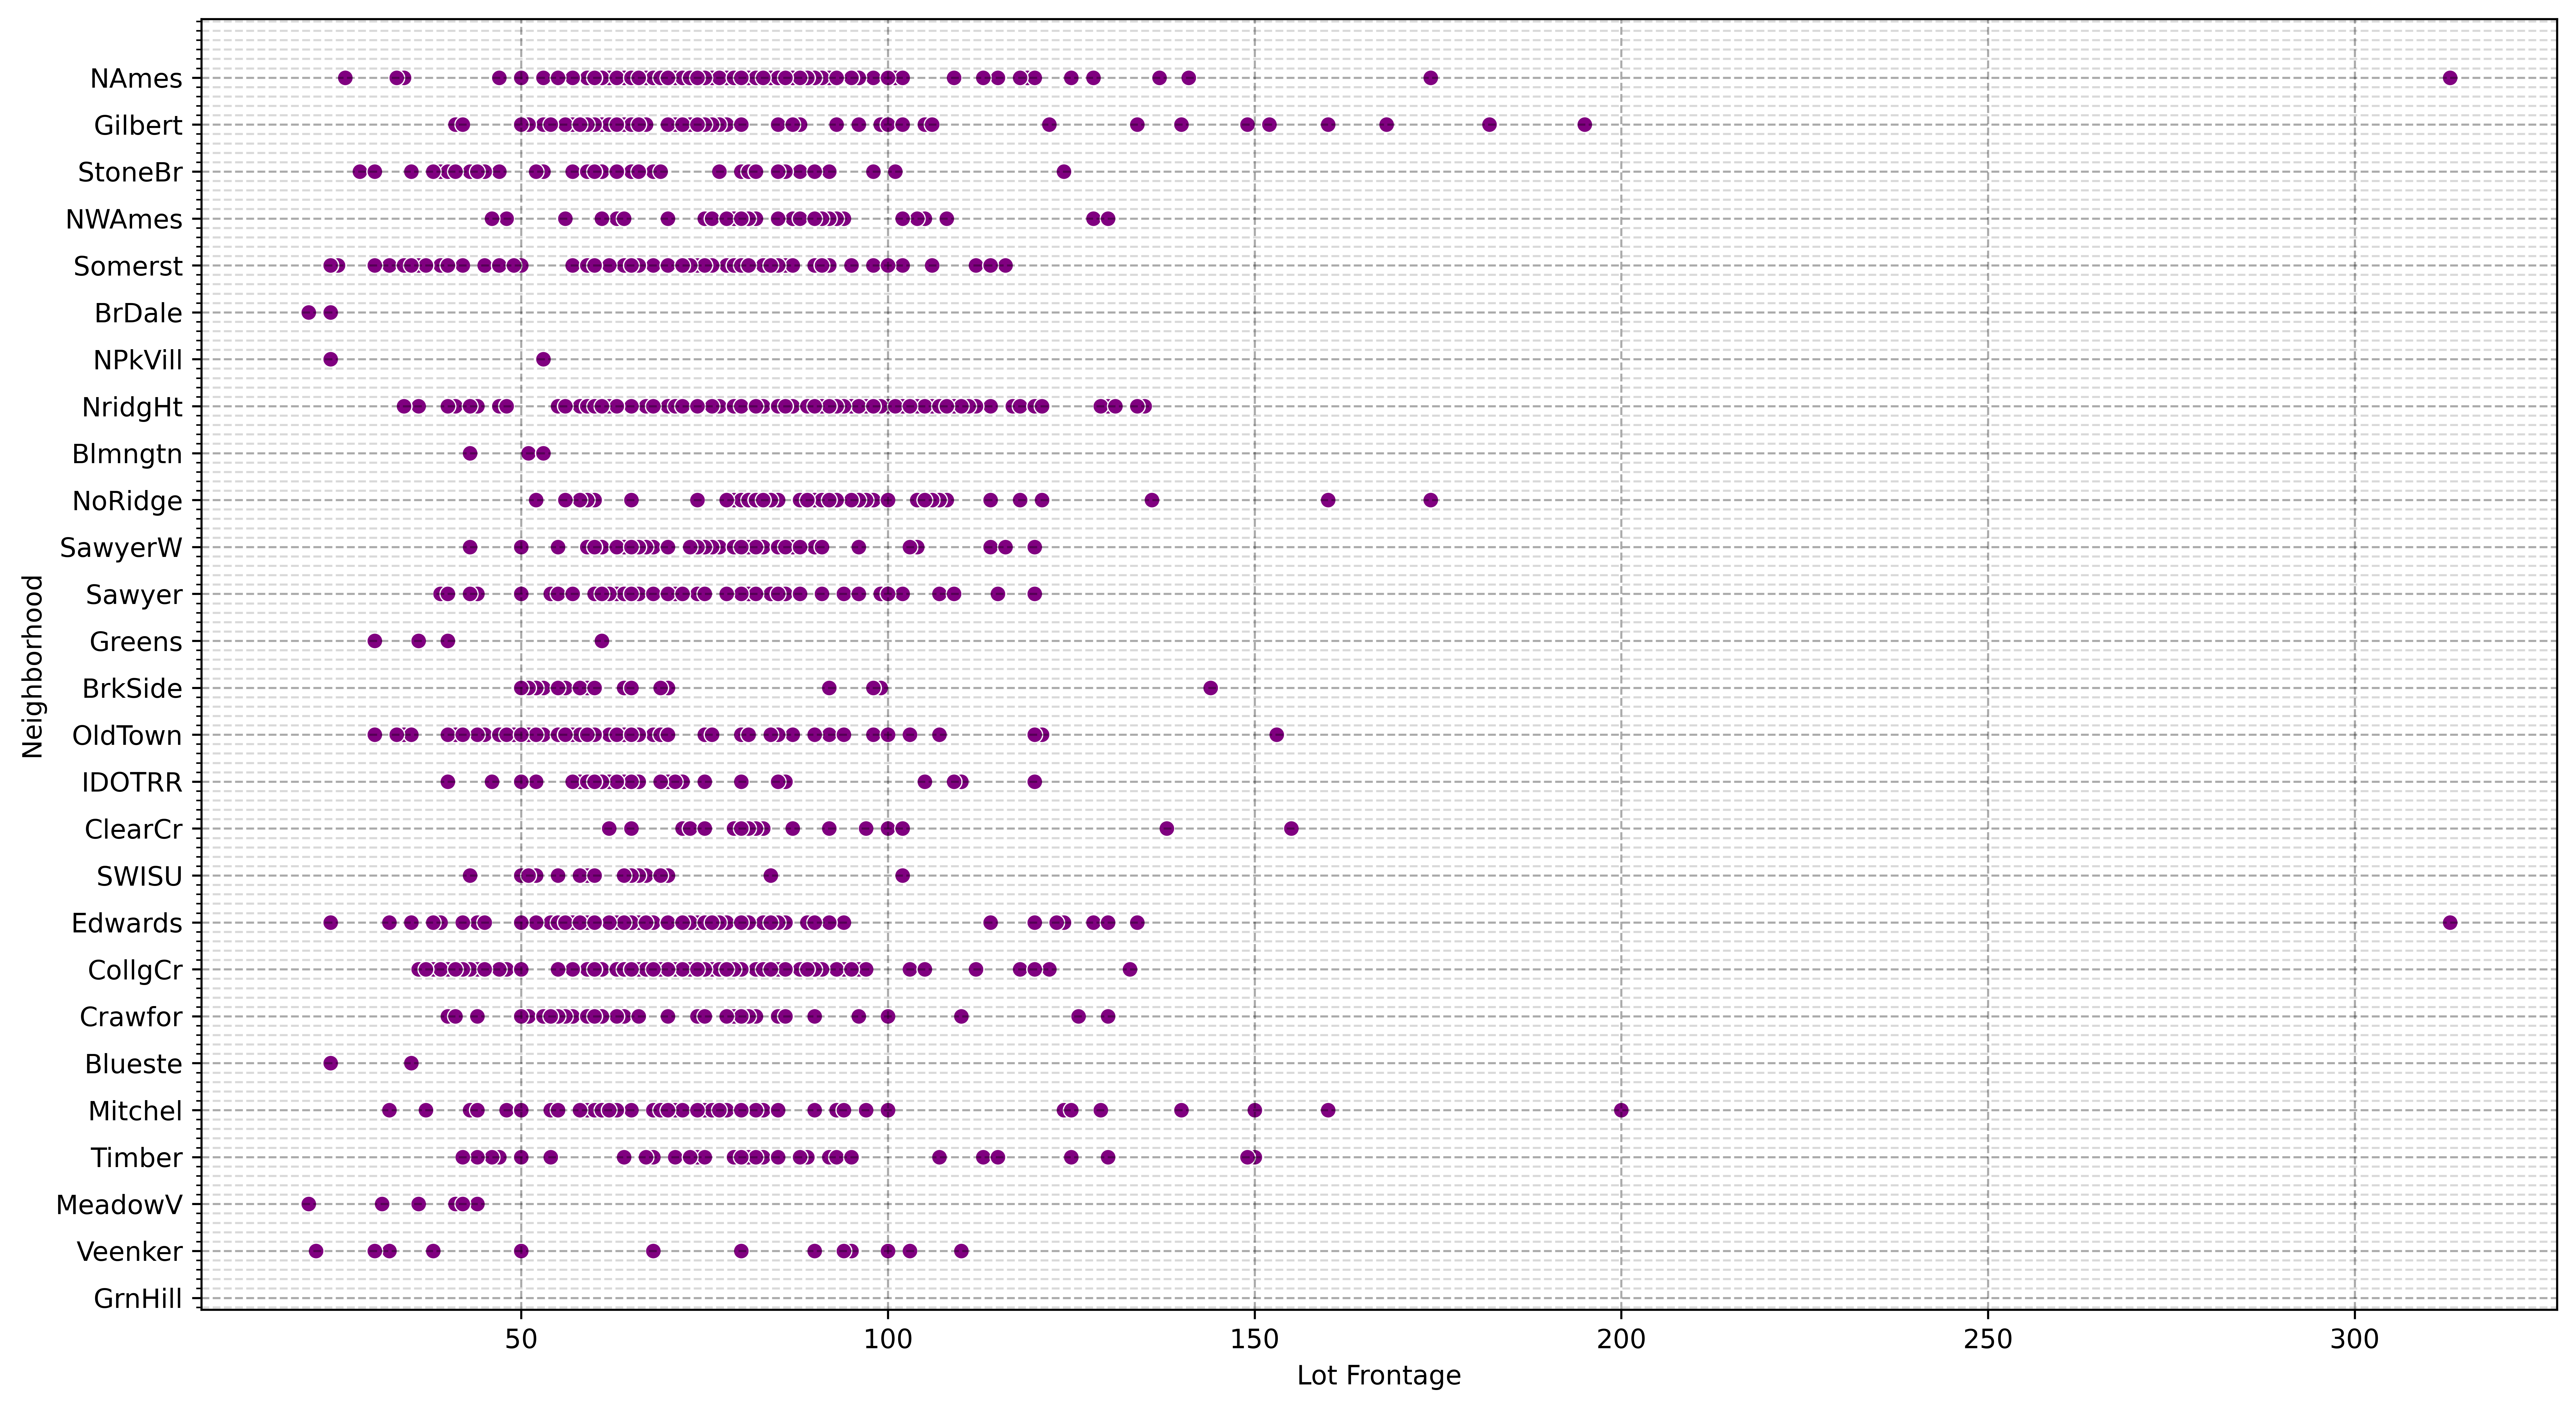

In [36]:
Std_Vis_Plot()
sns.scatterplot(y='Neighborhood',x='Lot Frontage',data=df,color='purple');

In [37]:
df[df['Lot Frontage'].isnull()]['Neighborhood'].unique()

array(['Gilbert', 'StoneBr', 'Somerst', 'NAmes', 'SawyerW', 'Sawyer',
       'NWAmes', 'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards',
       'CollgCr', 'Mitchel', 'Timber', 'MeadowV', 'NPkVill', 'NoRidge',
       'Veenker', 'Crawfor', 'Blmngtn', 'IDOTRR', 'NridgHt', 'GrnHill',
       'Greens', 'Landmrk'], dtype=object)

In [38]:
df[df['Lot Frontage'].isnull()][group_by]

11      Gilbert
14      StoneBr
22      Somerst
23        NAmes
24        NAmes
         ...   
2894     Timber
2897     Timber
2898     Timber
2912    Mitchel
2926    Mitchel
Name: Neighborhood, Length: 490, dtype: object

In [39]:
df = df.loc[df['Neighborhood'].isin((df['Neighborhood'].value_counts()).index[df['Neighborhood'].value_counts() > 2])]

#Gemstone for loop that genereates and 'fillna' an random value between minimum and maximum statistical Lot Frontage value based on Neighborhood
Neighborhood_dict_vol = {}
group_by='Neighborhood'
vol_df=df.set_index('Neighborhood')
for item in df[df['Lot Frontage'].isnull()][group_by]:
     #Min values
    lot_front_min=df.groupby(group_by)['Lot Frontage'].mean()-(norm.ppf(0.95)*df.groupby(group_by)['Lot Frontage'].std()/(np.sqrt(df.groupby(group_by)['Lot Frontage'].count())))
    lot_front_min=lot_front_min.fillna(0)
    #Max values
    lot_front_max=df.groupby(group_by)['Lot Frontage'].mean()+(norm.ppf(0.95)*df.groupby(group_by)['Lot Frontage'].std()/(np.sqrt(df.groupby(group_by)['Lot Frontage'].count())))
    lot_front_max=lot_front_max.fillna(0)
    Neighborhood_dict_vol[item] = np.random.uniform(low=lot_front_min[item],high=lot_front_max[item],size=None)  
    #print(f'{item} -> {round(Neighborhood_dict_vol[item]),ndigits=3)}')
    #df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna((val.mean())))
    #df['Lot Frontage'] = vol_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna((Neighborhood_dict_vol)))
    #df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna((Neighborhood_dict_vol[iem])))
    df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(np.random.uniform(low=(x.mean()-(norm.ppf(0.95)*x.std()/np.sqrt(x.count()))),high=(x.mean()+(norm.ppf(0.95)*x.std()/np.sqrt(x.count()))),size=None)))
        #vol2_df=vol_df.groupby('Neighborhood').fillna((Neighborhood_dict_vol)) 
        #vol2_df.reset_index()
        #df['Lot Frontage'] = vol_df.groupby('Neighborhood')['Lot Frontage'].fillna((Neighborhood_dict_vol))                                            
        #df[df['Neighborhood'].isin([item])].fillna(np.random.uniform(low=lot_front_min[item],high=lot_front_max[item],size=None),inplace=True)

In [40]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda x: x.fillna(np.random.uniform(low=(x.mean()-(norm.ppf(0.95)*x.std()/np.sqrt(x.count()))),high=(x.mean()+(norm.ppf(0.95)*x.std()/np.sqrt(x.count()))),size=None)))

vol_df.groupby('Neighborhood')['Lot Frontage'].fillna((Neighborhood_dict_vol))

vol_df['Lot Frontage']

item='Landmrk'
Neighborhood_dict_vol.get(item)

vol_df.groupby('Neighborhood')['Lot Frontage'].fillna((Neighborhood_dict_vol)) 

vol_df.groupby('Neighborhood')['Lot Frontage'].fillna((Neighborhood_dict_vol))

df.groupby('Neighborhood')['Lot Frontage'].first()

df.groupby('Neighborhood')['Lot Frontage'].transform(lambda vol: vol.fillna((Neighborhood_dict_vol)))

df['Lot Frontage']

Neighborhood_dict_vol

lot_front_max=df.groupby(group_by)['Lot Frontage'].mean()+(norm.ppf(0.95)*df.groupby(group_by)['Lot Frontage'].std()/(np.sqrt(df.groupby(group_by)['Lot Frontage'].count())))
lot_front_max=lot_front_max.fillna(0)
lot_front_max

df

## Transform Column

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html

In [41]:
df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley Lot Shape  \
0           20        RL         141.0     31770   Pave    NA       IR1   
1           20        RH          80.0     11622   Pave    NA       Reg   
2           20        RL          81.0     14267   Pave    NA       IR1   
3           20        RL          93.0     11160   Pave    NA       Reg   
4           60        RL          74.0     13830   Pave    NA       IR1   

  Land Contour Utilities Lot Config  ... Pool Area Pool QC  Fence  \
0          Lvl    AllPub     Corner  ...         0      NA     NA   
1          Lvl    AllPub     Inside  ...         0      NA  MnPrv   
2          Lvl    AllPub     Corner  ...         0      NA     NA   
3          Lvl    AllPub     Corner  ...         0      NA     NA   
4          Lvl    AllPub     Inside  ...         0      NA  MnPrv   

  Misc Feature Misc Val Mo Sold  Yr Sold  Sale Type  Sale Condition  SalePrice  
0           NA        0       5     2010        WD           Normal     215000  
1           NA        0       6     2010        WD           Normal     105000  
2         Gar2    12500       6     2010        WD           Normal     172000  
3           NA        0       4     2010        WD           Normal     244000  
4           NA        0       3     2010        WD           Normal     189900  

[5 rows x 80 columns]

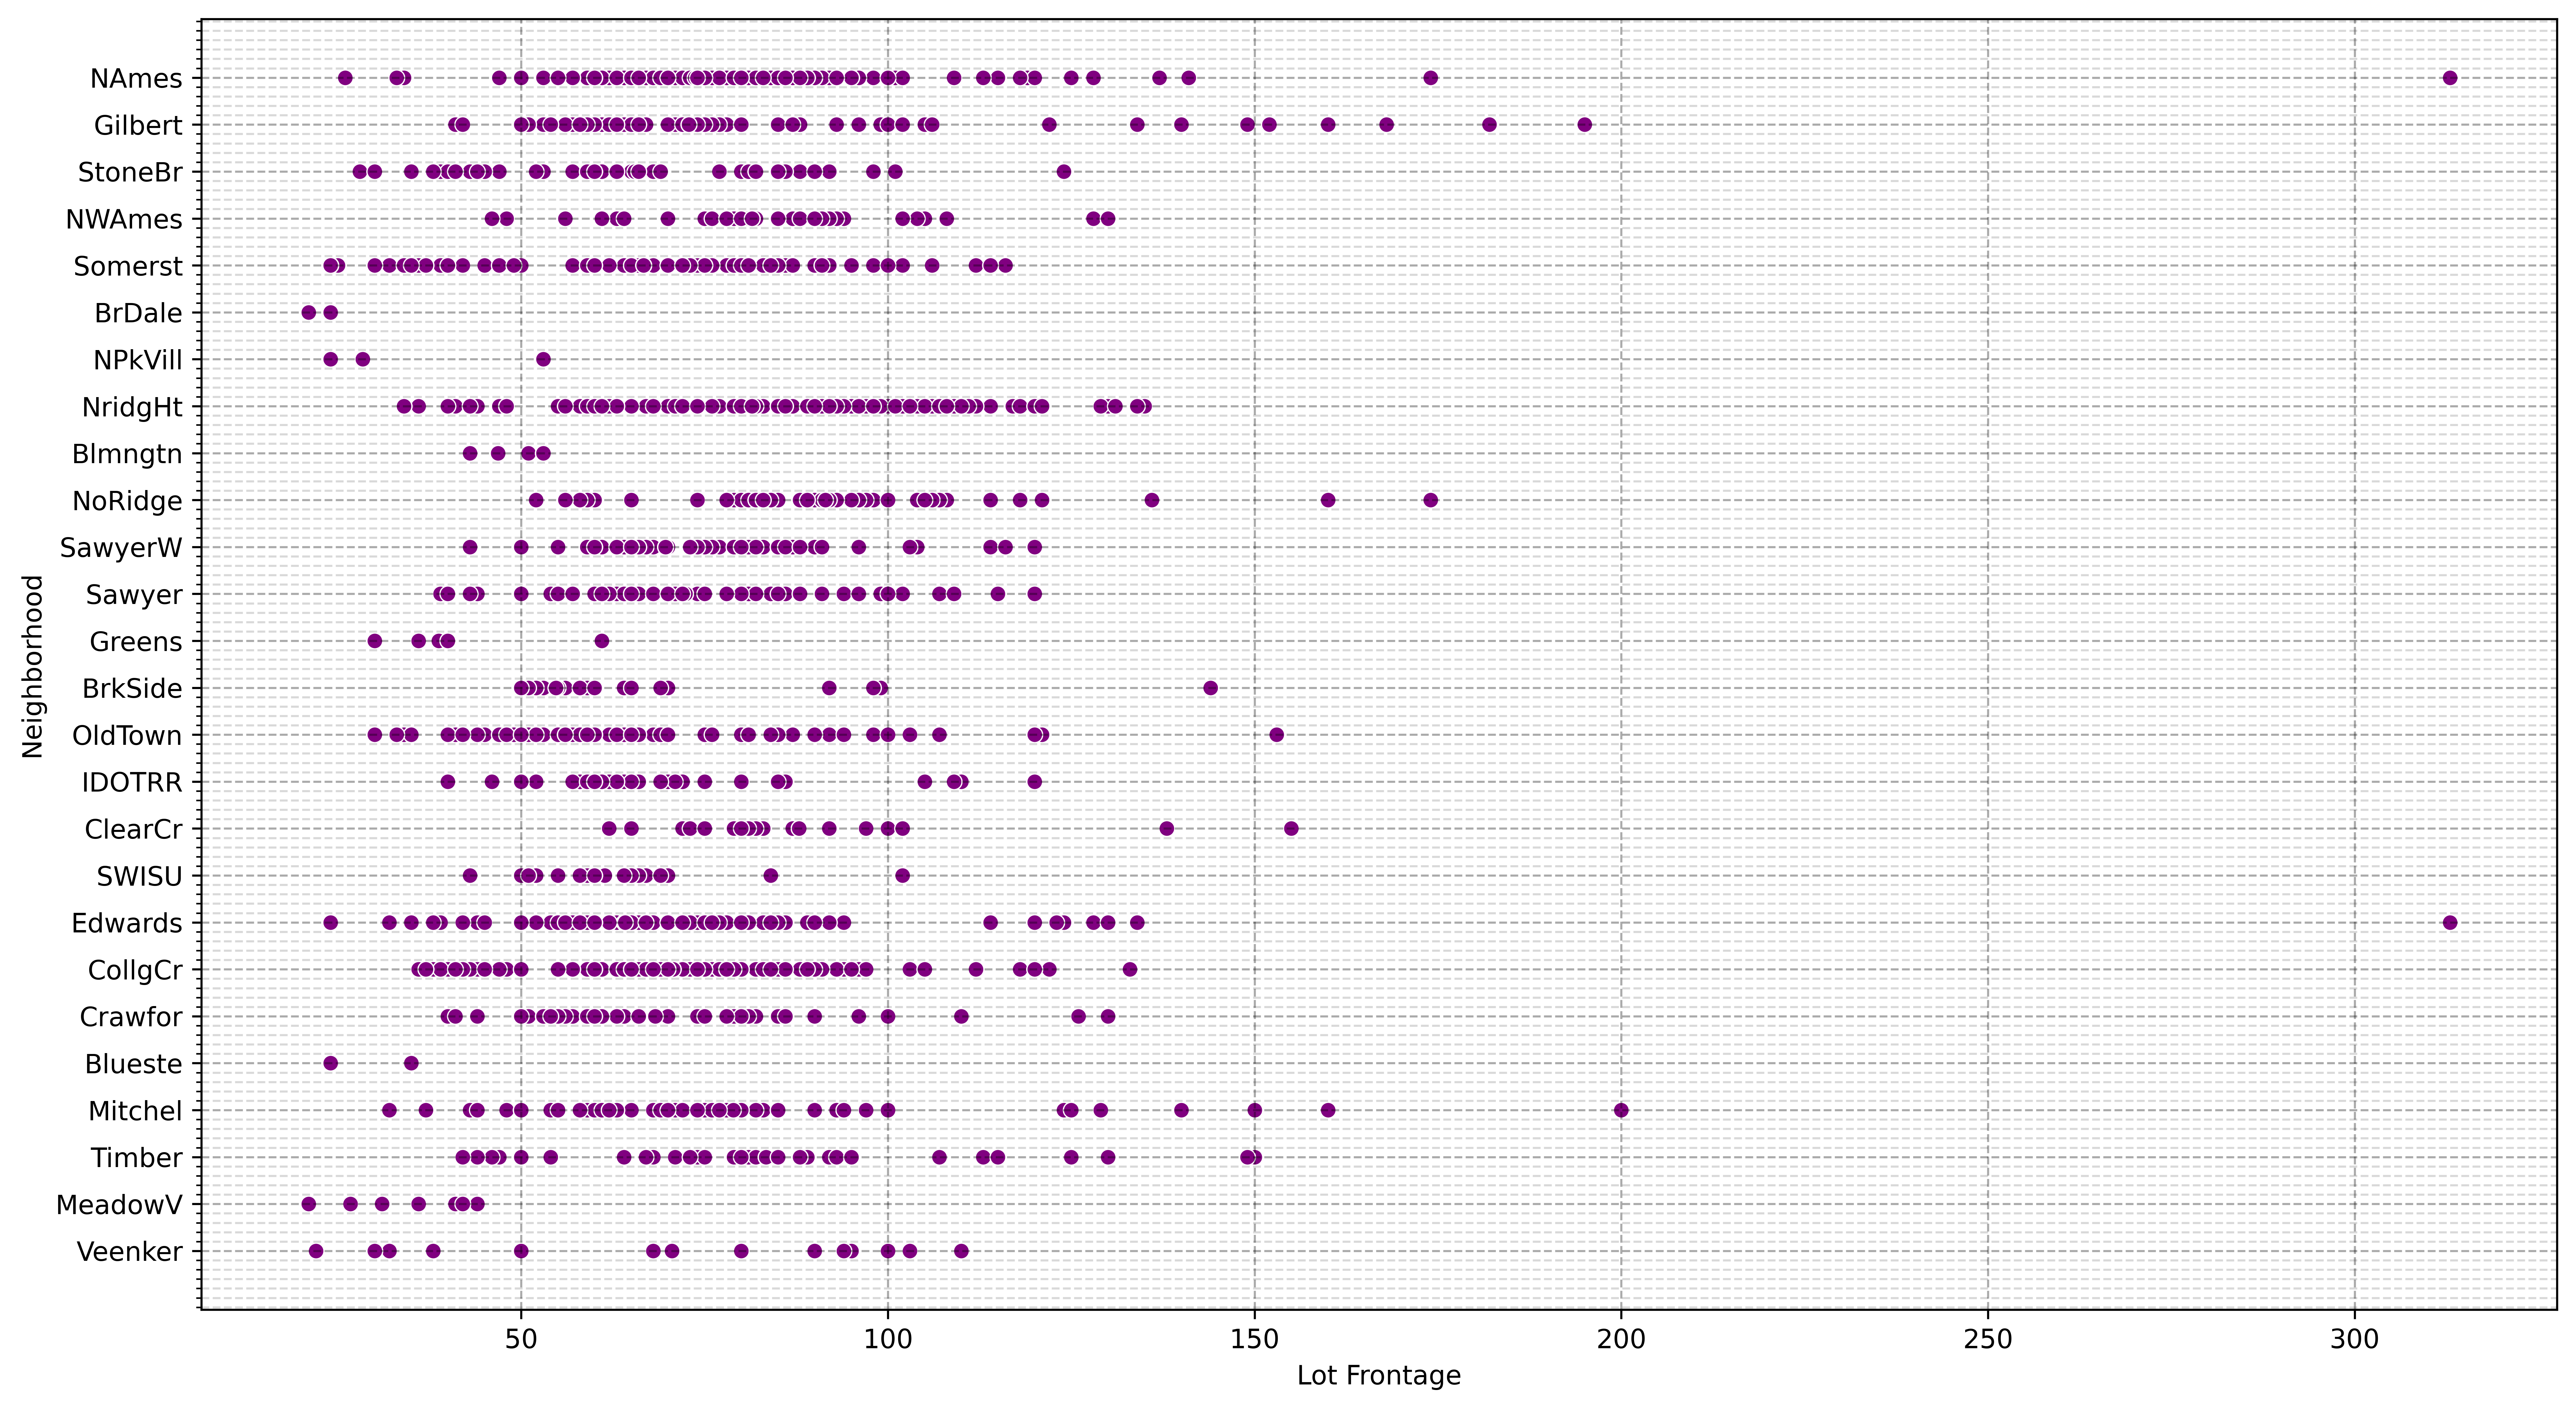

In [42]:
Std_Vis_Plot()
sns.scatterplot(y='Neighborhood',x='Lot Frontage',data=df,color='purple');

In [43]:
df.to_csv('../DATA/AMES_Check_nan_DF.csv',index=False)

In [44]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

Great! We no longer have any missing data in our entire data set! Keep in mind, we should eventually turn all these transformations into an easy to use function. For now, lets' save this dataset:

In [45]:
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [46]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [47]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [48]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.590505
Kitchen Qual_TA     -0.526475
Fireplace Qu_NA     -0.481476
Bsmt Qual_TA        -0.452518
Garage Finish_Unf   -0.421541
                       ...   
Garage Area          0.641455
Garage Cars          0.649201
Gr Liv Area          0.707331
Overall Qual         0.799429
SalePrice            1.000000
Name: SalePrice, Length: 275, dtype: float64

In [49]:
final_df.describe()

MS SubClass  Lot Frontage       Lot Area  Overall Qual  Overall Cond  \
count  2926.000000   2926.000000    2926.000000   2926.000000   2926.000000   
mean     57.301777     69.787518   10151.080656      6.094668      5.563910   
std      42.591370     21.742698    7884.391316      1.411646      1.112101   
min      20.000000     21.000000    1300.000000      1.000000      1.000000   
25%      20.000000     60.000000    7440.250000      5.000000      5.000000   
50%      50.000000     70.000000    9436.500000      6.000000      5.000000   
75%      70.000000     80.000000   11556.000000      7.000000      6.000000   
max     190.000000    313.000000  215245.000000     10.000000      9.000000   

        Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
count  2926.000000     2926.000000   2926.000000   2926.000000   2926.000000   
mean   1971.322967     1984.250171    101.153452    442.591251     49.748804   
std      30.251367       20.867960    178.709124    455.583728    169.249709   
min    1872.000000     1950.000000      0.000000      0.000000      0.000000   
25%    1954.000000     1965.000000      0.000000      0.000000      0.000000   
50%    1973.000000     1993.000000      0.000000    370.500000      0.000000   
75%    2001.000000     2004.000000    162.750000    734.000000      0.000000   
max    2010.000000     2010.000000   1600.000000   5644.000000   1526.000000   

       ...  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  Sale Type_VWD  \
count  ...      2926.000000    2926.000000    2926.000000    2926.000000   
mean   ...         0.002734       0.081681       0.002392       0.000342   
std    ...         0.052226       0.273926       0.048861       0.018487   
min    ...         0.000000       0.000000       0.000000       0.000000   
25%    ...         0.000000       0.000000       0.000000       0.000000   
50%    ...         0.000000       0.000000       0.000000       0.000000   
75%    ...         0.000000       0.000000       0.000000       0.000000   
max    ...         1.000000       1.000000       1.000000       1.000000   

       Sale Type_WD   Sale Condition_AdjLand  Sale Condition_Alloca  \
count    2926.000000             2926.000000            2926.000000   
mean        0.865345                0.004101               0.008202   
std         0.341413                0.063920               0.090210   
min         0.000000                0.000000               0.000000   
25%         1.000000                0.000000               0.000000   
50%         1.000000                0.000000               0.000000   
75%         1.000000                0.000000               0.000000   
max         1.000000                1.000000               1.000000   

       Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
count            2926.000000            2926.000000             2926.000000  
mean                0.015721               0.823308                0.083732  
std                 0.124416               0.381473                0.277033  
min                 0.000000               0.000000                0.000000  
25%                 0.000000               1.000000                0.000000  
50%                 0.000000               1.000000                0.000000  
75%                 0.000000               1.000000                0.000000  
max                 1.000000               1.000000                1.000000  

[8 rows x 275 columns]

In [50]:
final_df['Overall Qual']

0       6
1       5
2       6
3       7
4       5
       ..
2925    6
2926    5
2927    5
2928    5
2929    7
Name: Overall Qual, Length: 2926, dtype: int64

c:\users\thorugo\appdata\local\programs\python\python37\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


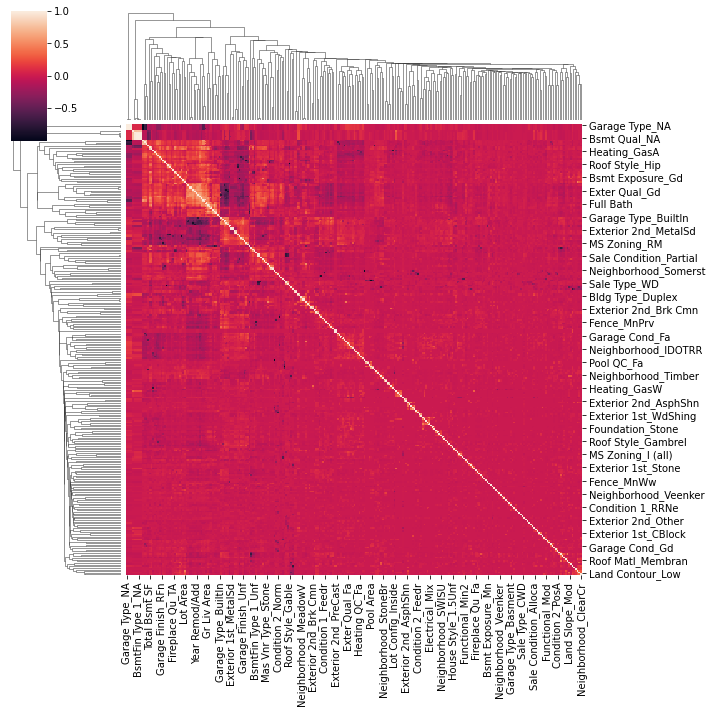

In [51]:
sns.clustermap(data=final_df.drop('SalePrice',axis=1).corr())

In [52]:
clustered_df = DBSCAN(eps=1, min_samples=2).fit(final_df)

In [53]:
clustered_df.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

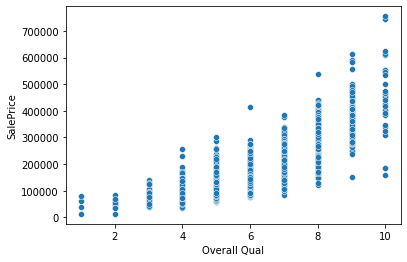

In [54]:
sns.scatterplot(data=final_df,x='Overall Qual',y='SalePrice')

In [55]:
final_df.to_csv('../DATA/AMES_Final_DF.csv',index=False)

----